<a href="https://colab.research.google.com/github/Madhumitha-Reddy/OIBSIP/blob/main/Unemployment_analysis_with_python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT NAME - UNEMPLOYMENT ANALYSIS WITH PYTHON

Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19,
so analyzing the unemployment rate

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [6]:
#Load the unemployment data from a CSV file
df = pd.read_csv('Unemployment in India.csv')

In [7]:
df.sample(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
467,Gujarat,31-05-2019,Monthly,4.09,9686558.0,41.67,Urban
702,Tripura,30-09-2019,Monthly,33.57,418043.0,66.90,Urban
760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Chhattisgarh,31-12-2019,Monthly,6.11,6569385.0,42.59,Rural
434,Chhattisgarh,31-12-2019,Monthly,3.57,2415436.0,45.59,Urban


In [8]:
#check for missing values
print(df.isnull().sum())

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [9]:
#to fill missing values, handle item (e.g., by filling or dropping)
df.fillna(method='ffill', inplace=True)

/tmp/ipython-input-9-2746068993.py:2: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [11]:
df[' Frequency'].value_counts()
df.duplicated().sum()
df = df.drop_duplicates()

In [14]:
for col in df.columns:
    print(col)

Region
 Date
 Frequency
 Estimated Unemployment Rate (%)
 Estimated Employed
 Estimated Labour Participation Rate (%)
Area


In [20]:
print(df.dtypes)

Region                                              object
 Date                                               object
 Frequency                                          object
 Estimated Unemployment Rate (%)                   float64
 Estimated Employed                                float64
 Estimated Labour Participation Rate (%)           float64
Area                                                object
Day                                                 object
Month                                               object
Year                                        datetime64[ns]
dtype: object


In [16]:
df[["Day", "Month", "Year"]] = df[' Date'].str.split("-", expand = True)
df

/tmp/ipython-input-16-1466379796.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,31,05,2019
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,30,06,2019
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,31,07,2019
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,31,08,2019
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,30,09,2019
...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban,29,02,2020
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban,31,03,2020
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban,30,04,2020
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban,31,05,2020


In [18]:
#convert the year column to datetime if it is in string format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df

/tmp/ipython-input-18-1116426398.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,31,05,2019-01-01
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,30,06,2019-01-01
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,31,07,2019-01-01
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,31,08,2019-01-01
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,30,09,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban,29,02,2020-01-01
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban,31,03,2020-01-01
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban,30,04,2020-01-01
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban,31,05,2020-01-01


In [19]:
print(df.dtypes)

Region                                              object
 Date                                               object
 Frequency                                          object
 Estimated Unemployment Rate (%)                   float64
 Estimated Employed                                float64
 Estimated Labour Participation Rate (%)           float64
Area                                                object
Day                                                 object
Month                                               object
Year                                        datetime64[ns]
dtype: object


In [21]:
#summary statistics
print(df.describe())

        Estimated Unemployment Rate (%)  ...                           Year
count                        740.000000  ...                            740
mean                          11.787946  ...  2019-06-02 21:43:47.027026944
min                            0.000000  ...            2019-01-01 00:00:00
25%                            4.657500  ...            2019-01-01 00:00:00
50%                            8.350000  ...            2019-01-01 00:00:00
75%                           15.887500  ...            2020-01-01 00:00:00
max                           76.740000  ...            2020-01-01 00:00:00
std                           10.721298  ...                            NaN

[8 rows x 4 columns]


In [31]:
print(df.columns.tolist())

['Region', 'Date', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area', 'Day', 'Month', 'Year']


Text(0.5, 1.0, 'Correlation Heatmap')

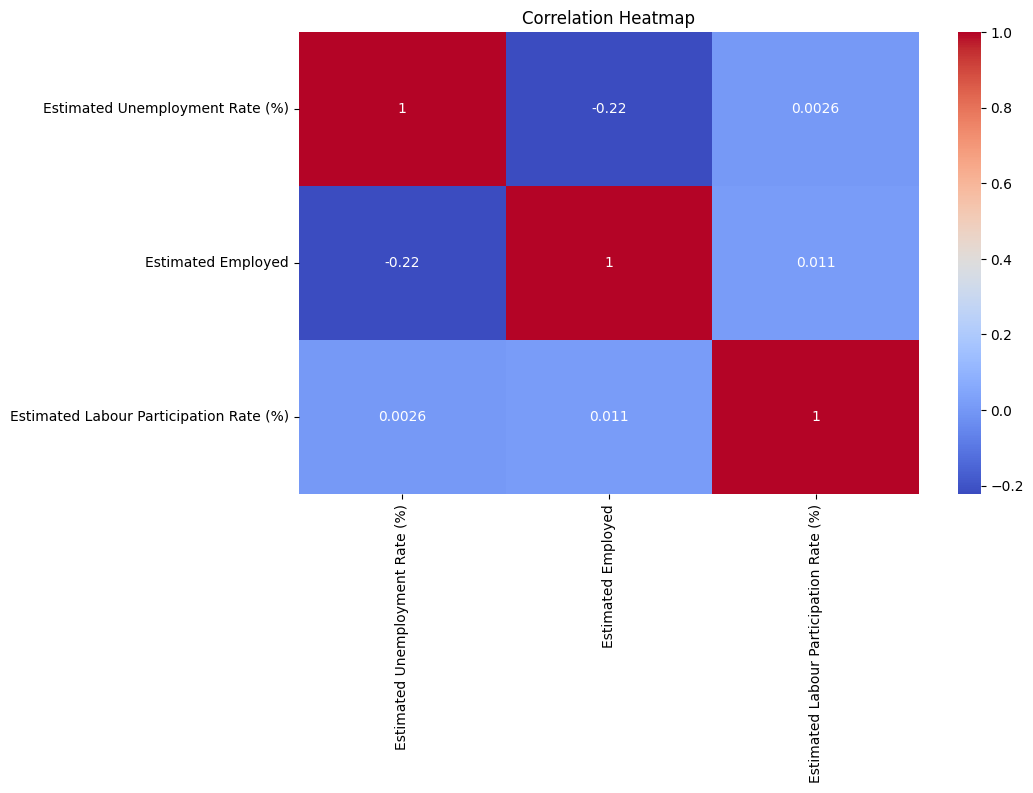

In [33]:
#filter the dataframe to include only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

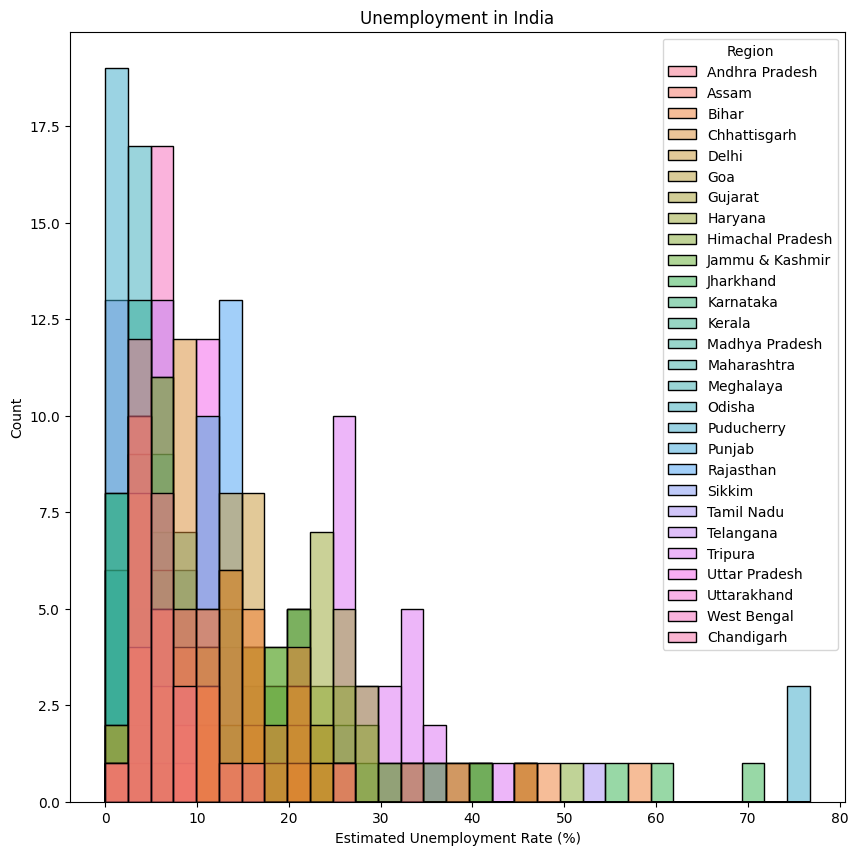

In [36]:
plt.figure(figsize=(10,10))
plt.title("Unemployment in India")
sns.histplot(x='Estimated Unemployment Rate (%)',hue= "Region", data=df, kde=False)
plt.show()

In [37]:
df.Month.unique()

array(['05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03',
       '04'], dtype=object)

<Axes: xlabel='Month', ylabel='Estimated Unemployment Rate (%)'>

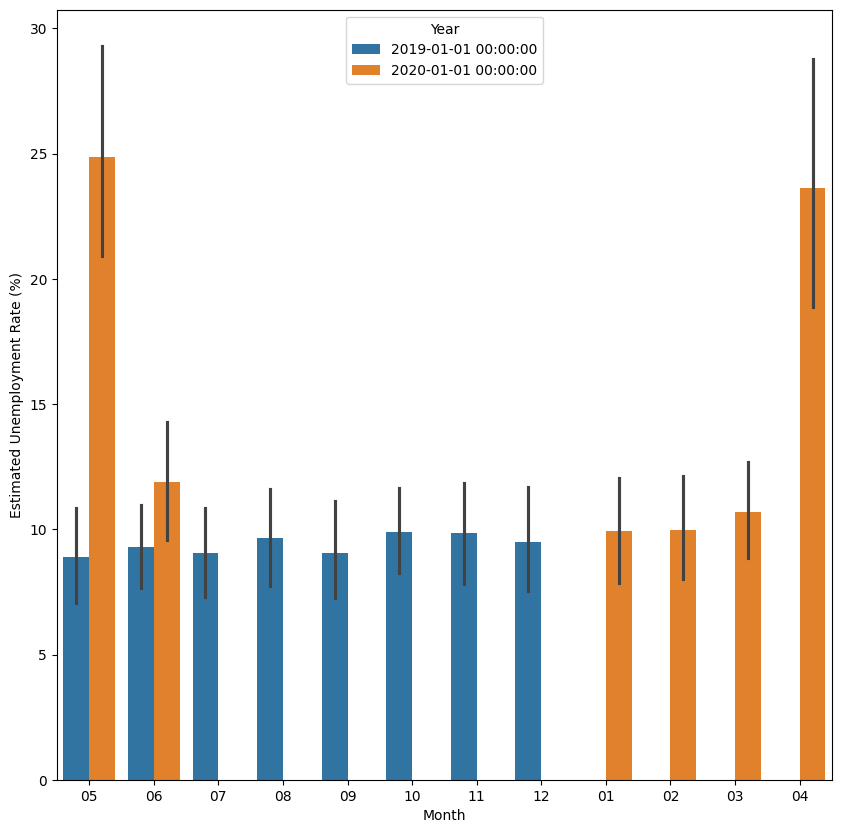

In [39]:
plt.figure(figsize=(10,10))
sns.barplot(x="Month", y="Estimated Unemployment Rate (%)",hue="Year",data=df)

<Axes: xlabel='Day', ylabel='Estimated Unemployment Rate (%)'>

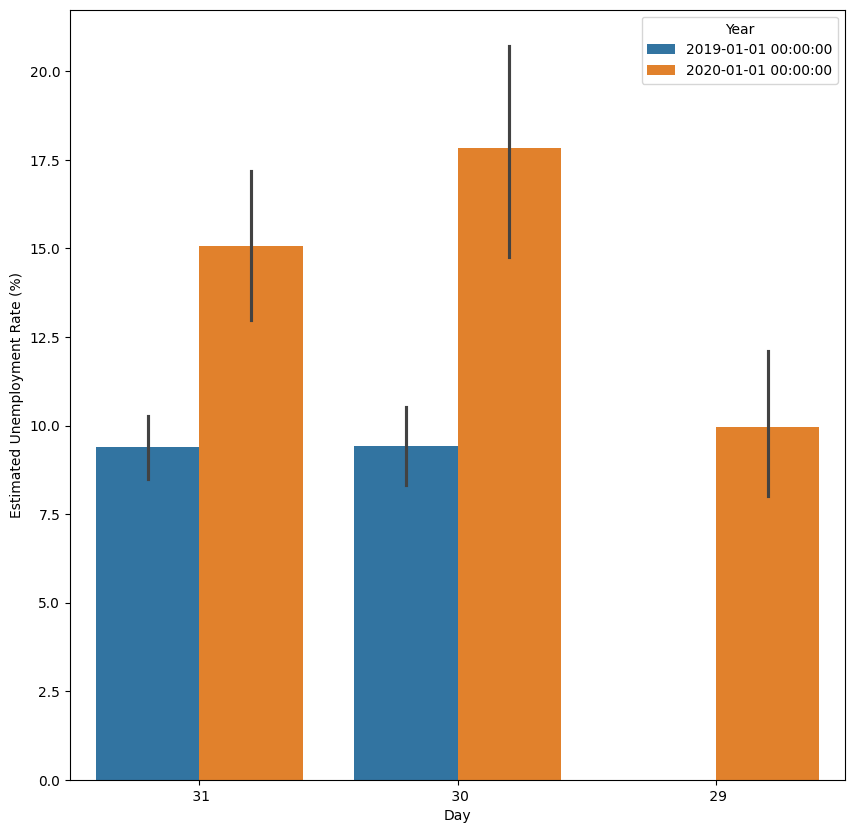

In [40]:
plt.figure(figsize=(10,10))
sns.barplot(x="Day", y="Estimated Unemployment Rate (%)",hue="Year",data=df)

/tmp/ipython-input-42-2398071369.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-42-2398071369.py:5: UserWarning:


The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.



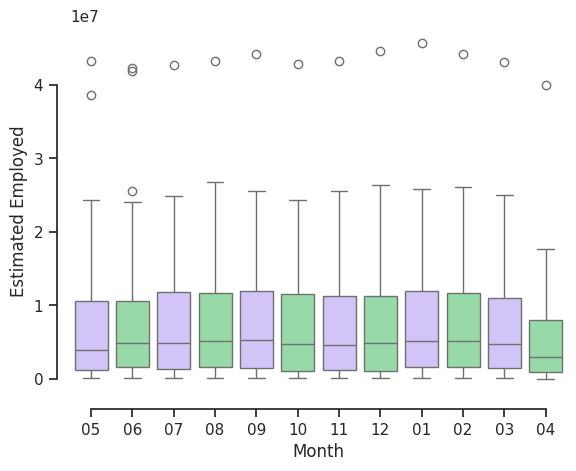

In [42]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

#draw a nested boxplot to show bills by day and time
sns.boxplot(x="Month", y='Estimated Employed', palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

In [19]:
print(df.columns.tolist())

['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Region.1', 'longitude', 'latitude']


In [17]:
df.columns = df.columns.str.strip()

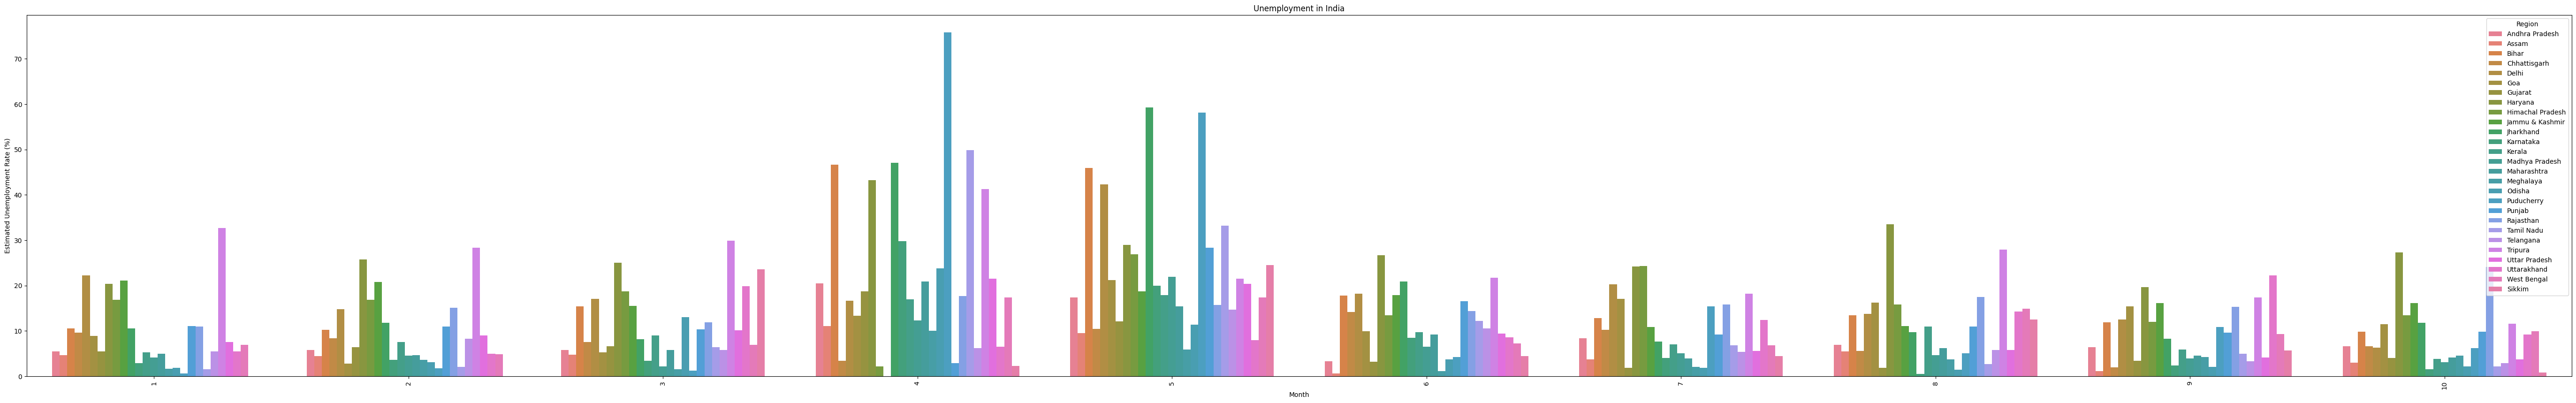

In [26]:
plt.figure(figsize=(70,10))
plt.title("Unemployment in India")
sns.barplot(x="Month", y="Estimated Unemployment Rate (%)", hue="Region", data=df)
plt.xticks(rotation=90)
plt.show()

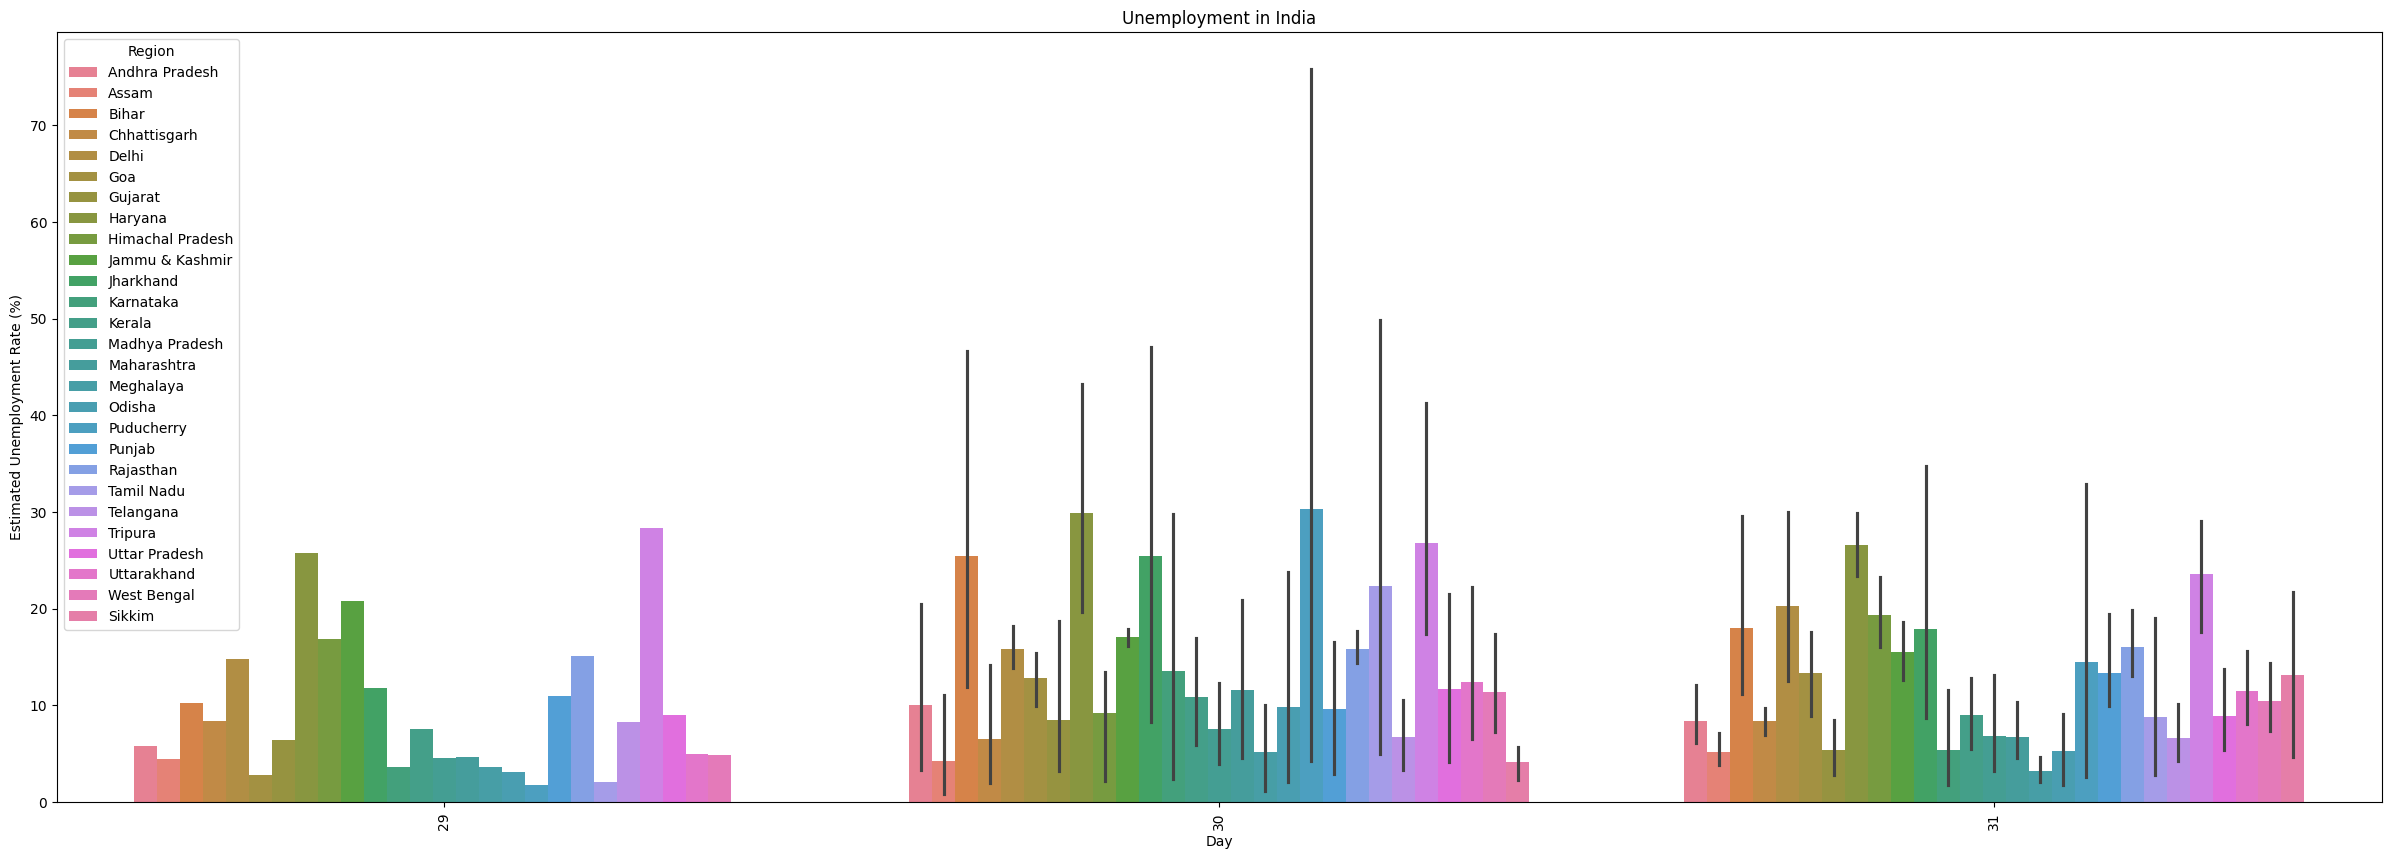

In [29]:
plt.figure(figsize=(30,10))
plt.title("Unemployment in India")
sns.barplot(x="Day", y="Estimated Unemployment Rate (%)", hue="Region", data=df)
plt.xticks(rotation=90)
plt.show()

In [34]:
unemployment = df[["Region","Estimated Unemployment Rate (%)"]]
figure = px.sunburst(unemployment, path=["Region"],
                     values="Estimated Unemployment Rate (%)",
                     width=700, height=700,
                     title="Unemployment Rate in India")
figure.show()